In [1]:
import cv2
import numpy as np

In [2]:
def BGR2GRAY(img):
    b,g,r = cv2.split(img)
    gray = (0.2126 * r + 0.7152 * g + 0.0722 * b).astype('uint8') #一定要变成uint8哦
    return gray

In [3]:
def Laplace_filter(img,kernel): 
    half_kshape = kernel.shape[0]//2
    pad = half_kshape
    img_pad = np.zeros((img.shape[0] + pad * 2, img.shape[1] + pad * 2), dtype=np.float)
    img_pad[pad: pad + img.shape[0], pad: pad + img.shape[1]] = img.copy().astype(np.float)
    temp = img_pad.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_pad[i+half_kshape,j+half_kshape] = np.sum(kernel*(temp[i:i+kernel.shape[0],j:j+kernel.shape[0]]))
    img_pad = np.clip(img_pad,0,255)#重要！
    output = img_pad[half_kshape:half_kshape+img.shape[0],half_kshape:half_kshape+img.shape[1]]
    return output.astype(np.uint8)

In [4]:
kernel=np.array([[-2,-1,0],[-1,1,1],[0,1,2]]) 
img = cv2.imread(r'D:\Program Files (x86)\ImageProcessing100Wen-master\ImageProcessing100Wen-master\Question_01_10\imori_noise.jpg')
img_gray = BGR2GRAY(img)

In [5]:
output = Laplace_filter(img_gray,kernel)
cv2.imshow('2',output)
cv2.waitKey(0)
cv2.destroyAllWindows()

D:\temp\ipykernel_18628\4104505704.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_pad = np.zeros((img.shape[0] + pad * 2, img.shape[1] + pad * 2), dtype=np.float)
D:\temp\ipykernel_18628\4104505704.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_pad[pad: pad + img.shape[0], pad: pad + img.shape[1]] = img.copy().astype(np.

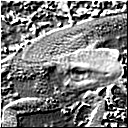